In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
import os
!ls

mm_agn_clusters.ipynb  mm_hmf_clusters.ipynb  mm_merge_photons.ipynb  README.md


List of clusters:

In [54]:
spisok = pd.read_csv("../data/eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')[:5000]
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
0,4488,0.158985,0.338312,-0.001185,0.001292,4.359560e+12,1.841289,1.841877,2.333170e+12,237.530,1.630180e+11,2.876200e+11,0.225047,0.430616,3.264381e-07,3.896570e+12,382.480,1
1,10920,0.411453,0.567867,-0.000886,0.001211,3.587970e+12,1.841375,1.841157,2.343910e+12,237.897,1.579330e+11,2.848240e+11,0.353030,0.298469,5.055408e-07,3.452630e+12,367.372,1
2,9879,0.614948,0.552184,-0.000867,0.001237,3.821110e+12,1.841381,1.840472,2.813710e+12,252.819,1.675460e+11,3.050620e+11,0.460362,0.866890,6.251936e-07,3.689000e+12,375.570,1
3,10554,0.338922,0.861748,-0.000626,0.001230,3.762290e+12,1.841451,1.842172,2.722610e+12,250.079,1.467930e+11,3.347020e+11,0.212813,0.135184,3.240774e-07,3.631350e+12,373.593,1
4,9471,0.790183,0.114536,-0.000542,0.001246,3.905190e+12,1.841475,1.841036,2.655260e+12,248.001,1.253810e+11,3.391100e+11,0.193536,0.347480,3.036291e-07,3.776650e+12,378.518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2718,0.942872,0.333803,0.507863,0.001275,4.187920e+12,1.994541,1.993917,2.554230e+12,244.803,1.456700e+11,2.860550e+11,0.232556,0.202183,3.158553e-07,3.973620e+12,384.982,0
4996,1745,0.465211,0.493064,0.507934,0.001720,1.028270e+13,1.994563,1.993893,7.622920e+12,352.465,3.267020e+11,9.038760e+11,0.534310,2.673170,1.106155e-06,9.990090e+12,523.487,0
4997,3077,0.688208,0.230344,0.508022,0.001461,6.305630e+12,1.994591,1.994219,3.694320e+12,276.844,2.412320e+11,4.079340e+11,0.662696,1.209120,1.003647e-06,5.778550e+12,436.174,0
4998,7222,0.374093,0.531179,0.508048,0.001283,4.266300e+12,1.994599,1.993546,1.814910e+12,218.443,9.000250e+10,2.306010e+11,0.127387,0.092736,1.751674e-07,3.731320e+12,376.993,0


In [55]:
%run -i '../functions.py'

M500s = spisok["M500"]
R500s = spisok["R500"]
T500s = spisok["T500"]
L500s = spisok["Lx500"]
zs = spisok["z_true"]

#for i in range(0, len(spisok)):
R500s_rel = R500(M500s, zs)
T500s_rel = T_X(M500s, zs)
L500s_rel = L_X(M500s, zs, 0.704)

<Figure size 640x480 with 0 Axes>

In [56]:
R500s_rel

array([236.77585426, 237.13936068, 252.02862392, ..., 277.38951511,
       218.87542884, 251.2542714 ])

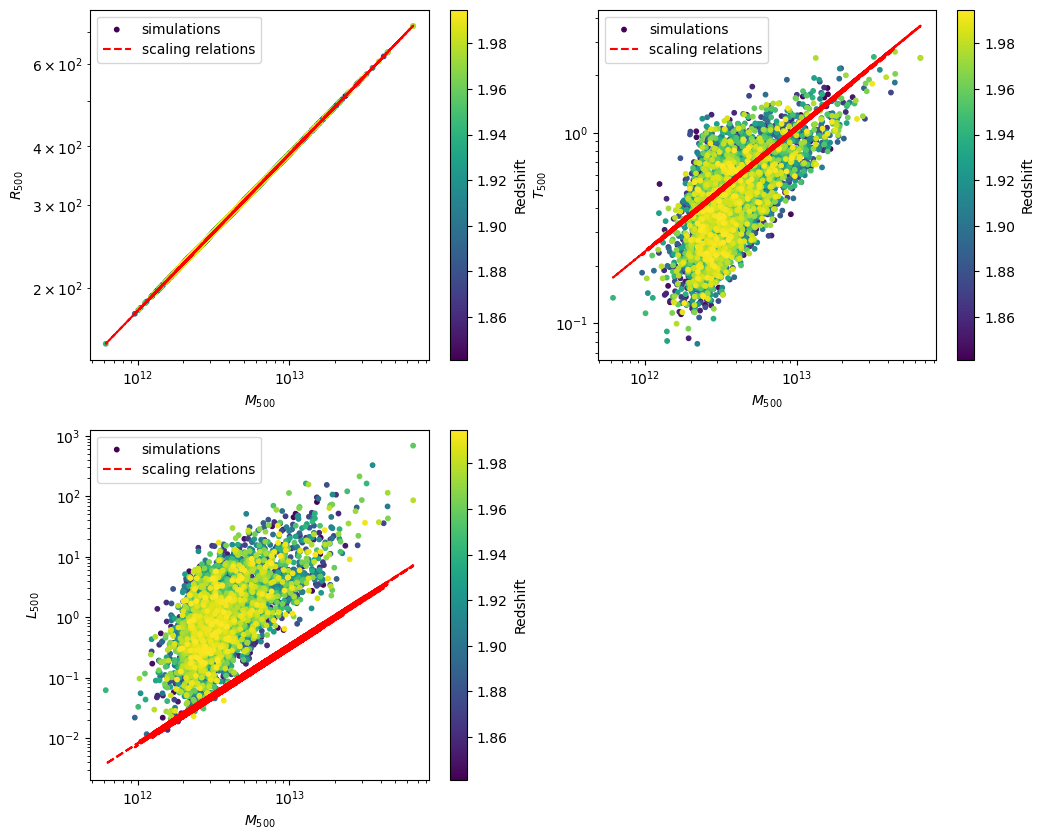

In [58]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.scatter(M500s, R500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$R_{500}$")
plt.legend()
plt.colorbar(label='Redshift')

plt.subplot(222)
plt.scatter(M500s, T500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$T_{500}$")
plt.legend()
plt.colorbar(label='Redshift')

plt.subplot(223)
plt.scatter(M500s, L500s, c=zs, cmap='viridis', s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$L_{500}$")
plt.legend()
plt.colorbar(label='Redshift')

plt.show()

In [13]:
max(spisok["z_true"])

2.1539604

Extracting $M_{500}$ and $z_{true}$. We know that $z_{true}$ values are unique!

In [5]:
M500_all = spisok["M500"].to_numpy().astype(float)
z_all = spisok["z_true"].to_numpy().astype(float)
t = list(zip(z_all, M500_all))
M500_all, z_all

(array([2.33317e+12, 2.34391e+12, 2.81371e+12, ..., 1.69391e+12,
        1.73655e+12, 2.70652e+13]),
 array([1.8412886 , 1.8413752 , 1.8413808 , ..., 0.0404726 , 0.04682363,
        0.04745632]))

Histograms for $M_{500}$ and $z_{true}$

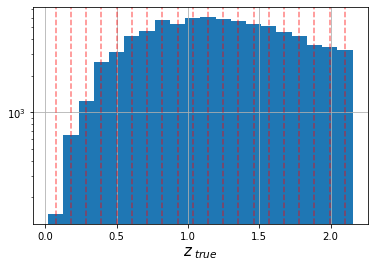

dz = 0.10669282540000001
[0.02010389 0.12679672 0.23348954 0.34018237 0.44687519 0.55356802
 0.66026084 0.76695367 0.8736465  0.98033932 1.08703215 1.19372497
 1.3004178  1.40711062 1.51380345 1.62049627 1.7271891  1.83388192
 1.94057475 2.04726757 2.1539604 ]
[0.0734503  0.18014313 0.28683596 0.39352878 0.50022161 0.60691443
 0.71360726 0.82030008 0.92699291 1.03368573 1.14037856 1.24707138
 1.35376421 1.46045703 1.56714986 1.67384269 1.78053551 1.88722834
 1.99392116 2.10061399]


In [10]:
N = 20

dndz, z_left, bars_z = plt.hist(z_all, bins=N, histtype='barstacked')
plt.yscale('log')
plt.xlabel("$z_{ \ true}$", fontsize = 15)
plt.grid()

dz = np.diff(z_left)[0]
z_binned = z_left[:-1]+dz/2

for _ in z_binned:
    plt.axvline(_, color='r', linestyle="--", alpha = 0.5)

plt.show()

print('dz =',dz)
print(z_left)
#print(np.diff(z_left)[0]/2)
print(z_binned)

The M500s from list of clusters are distributed according to redshift bins.

Dictionary keys are mean redshifts for bins, values are all masses corresponding to this bin.

In [15]:
dictionary = {}

for zz in z_binned:
    dictionary[zz] = []
    
dictionary

{0.07345030470000001: [],
 0.18014313010000002: [],
 0.2868359555: [],
 0.3935287809: [],
 0.5002216063: [],
 0.6069144316999999: [],
 0.7136072570999998: [],
 0.8203000824999999: [],
 0.9269929078999999: [],
 1.0336857333: [],
 1.1403785587000002: [],
 1.2470713841: [],
 1.3537642095: [],
 1.4604570349000001: [],
 1.5671498603: [],
 1.6738426857000002: [],
 1.7805355111: [],
 1.8872283365: [],
 1.9939211619000001: [],
 2.1006139872999996: []}

In [16]:
for _ in t:
    #print(_)
    z_current = _[0]
    for z_l in z_left[:-1]:
        if (z_current>=z_l) and (z_current<z_l+dz):
            #print(z_current, 'is between', z_l, 'and', z_l+dz)
            dictionary[z_l+dz/2].append(_[1])
        else:
            pass

In [17]:
summ = 0
for i in z_binned:
    summ = summ + len(dictionary[i])
summ

80723

Let's check everything for one certain z (in one certain bin of z):

In [18]:
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

[ 4. 16. 26. 20. 16. 13. 10.  9.  6.  4.  4.  6.  3.  3.  2.  1.  1.  0.
  0.  1.]
[141. 125.  99.  79.  63.  50.  40.  31.  25.  21.  17.  11.   8.   5.
   3.   2.   1.   1.   1.   0.]


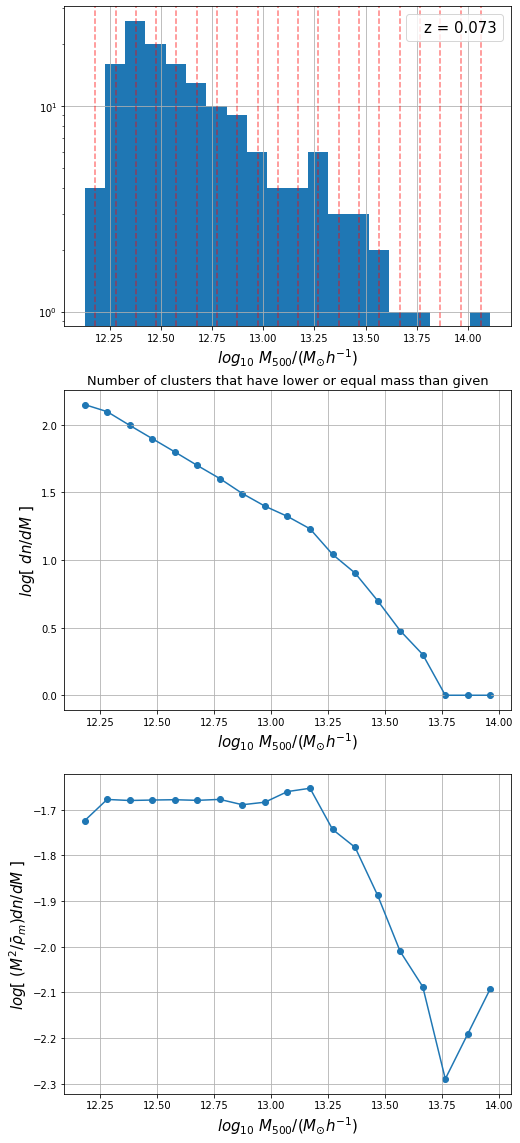

In [36]:
zzz = 0.07345030470000001

N1 = 20 # bins for masses

plt.figure(figsize=(8,20))
#plt.subplots(2, 2)

plt.subplot(3,1,1)
masses = dictionary[zzz]
dNdM, M_left, bars_M = plt.hist(np.log10(masses), bins=N1, histtype='barstacked', label = 'z = '+f"{zzz:.3f}")
plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 15)
plt.grid()
#bars_M.set_facecolor('red')
plt.legend(prop={'size': 15}, handlelength=0, loc=0)

dM=np.zeros(N1)
for i in range(0, N1):
    dM[i]=10**M_left[i+1]-10**M_left[i]
    #print(dM[i])
    
M_binned = 10**M_left[:-1]+dM/2
    
for _ in M_binned:
    plt.axvline(np.log10(_), color='r', linestyle="--", alpha = 0.5)

dNdM_cumulative=np.zeros(N1)
for i in range(len(dNdM)):
    dNdM_cumulative[i] = np.sum(dNdM[i+1:])
    
dndM = dNdM_cumulative/dif_comoving_volume(zzz) #Mpc^(-3)
    
#print(np.diff(M_left)[0]/2)
#print(dM)
#print(M_binned)
print(dNdM)
print(dNdM_cumulative)
#print(dndM)
#print(np.sum(M_binned*dndM))
#print(rho_crit(zzz))

plt.subplot(3,1,2)
yyy = dNdM_cumulative

plt.plot(np.log10(M_binned), np.log10(yyy))
plt.scatter(np.log10(M_binned), np.log10(yyy))
#plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 15)
plt.ylabel(r"$log[ \ dn/dM \ ]$", fontsize = 15)
plt.title("Number of clusters that have lower or equal mass than given", fontsize = 13)
plt.grid()

plt.subplot(3,1,3)
yyy = M_binned**2/rho_crit(zzz)/1e9*dndM/dM
#print(yyy)

#for i in range(N1):
#    print(yyy[i])
#    if yyy[i] != 0.:
plt.plot(np.log10(M_binned), np.log10(yyy))
plt.scatter(np.log10(M_binned), np.log10(yyy))
        
#plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 15)
plt.ylabel(r"$log[ \ (M^2/\bar{\rho}_{m}) dn/dM \ ]$", fontsize = 15)
plt.grid()
#plt.show()

In [37]:
masses = dictionary[zzz]
print(len(masses))

145


Let's define some functions:

In [38]:
#Cosmological Parameters from Magneticum:
Omega_M = 0.272
Omega_B = 0.0456      #(= 16.8 %)
Omega_L = 0.728
h = 0.704
n = 0.963
sigma_8 = 0.809

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100*h, Om0=Omega_M)

Comoving volume: 

$dV_C = D_H \frac{(1+z)^2 D^2_A}{E(z)}d \Omega dz$

$D_{\mathrm{H}} \equiv \frac{c}{H_{0}}=3000 h^{-1} \mathrm{Mpc}=9.26 \times 10^{25} h^{-1} \mathrm{~m}$

$E(z) \equiv \sqrt{\Omega_{\mathrm{M}}(1+z)^{3}+\Omega_{k}(1+z)^{2}+\Omega_{\Lambda}}$

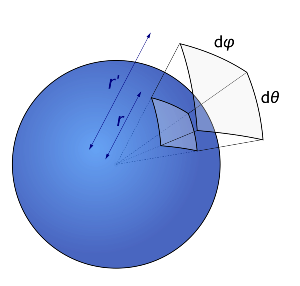

In [21]:
print(dz)

def dif_comoving_volume(z):
    
    Omega_M = 1
    Omega_L = 0
    
    D_H = 3000/h #Mpc
    
    E = np.sqrt(Omega_M*(1+z)**3+Omega_L)
    
    D_A = cosmo.angular_diameter_distance(z) #Mpc

    com_vol = D_H*(1+z)**2*D_A.value**2/E # this is dV_c / dOmega / dz
    
    side = 5*np.pi/180 #rad
    dOmega=side**2
    
    return com_vol*dOmega*dz

0.10669282540000001


Figure 5 from https://arxiv.org/pdf/astro-ph/9905116.pdf

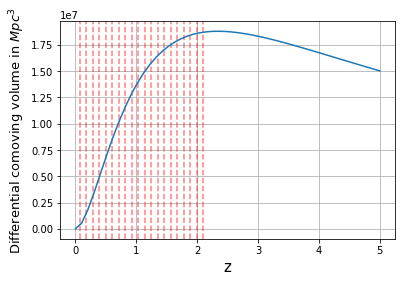

In [22]:
x = np.linspace(0, 5, 50)
y = dif_comoving_volume(x)#/D_H**3
#yy = cosmo.comoving_volume(x)
for _ in z_binned:
    plt.axvline(_, color='r', linestyle="--", alpha = 0.5)
plt.plot(x,y)
plt.xlabel('z', fontsize=15)
plt.ylabel('Differential comoving volume in $Mpc^3$', fontsize=13)
plt.grid()
plt.show()

$\bar{\rho}_{m}(z) \equiv \Omega_{m}(z) \rho_{\mathrm{crit}}(z)=\bar{\rho}_{m}(0)(1+z)^{3}$ (Tinker 2008)

In [42]:
def rho_crit(z):
    
    Omega_M = 1
    Omega_L = 0
    h = 0.704
    
    E_z_2 = Omega_M*(1+z)**3+Omega_L
    E_z = np.sqrt(E_z_2)
    #print(E_z)
    
    H = 100*h #km /s /Mpc
    
    #at z=0 
    #E_z_2 = 1
    #print('z = 0')
    
    rho_crit = 3.*(H/3.08e19)**2/8./np.pi/6.67e-11/h**2
    #print(rho_crit, "h^2 kg/m^3$")
    
    rho_crit = rho_crit*(3.08e19)**3/2e30
    #print(rho_crit, "h^2 Msun/kpc^3")
    
    #at z!=0
    #print('z =',z)
    
    rho_crit = rho_crit*E_z_2
    #print(rho_crit, "h^2 Msun/kpc^3 ")

    rho_crit = rho_crit*h**2
    #print(rho_crit, "Msun/kpc^3 ")
    
    #rho_crit = E_z_2* 3.*((70.*70.)/(8.*np.pi*4.302)) #in units of Msun/kpc^3
    #print(rho_crit, "Msun/kpc^3")
     
    return(rho_crit) # Msun/kpc^3
    
rho_crit(0.5)
#cosmo.critical_density(0.5)*(3.08e21)**3/2e33

460.99411089755836

Now let's do it for all bins and combine plots on the right:

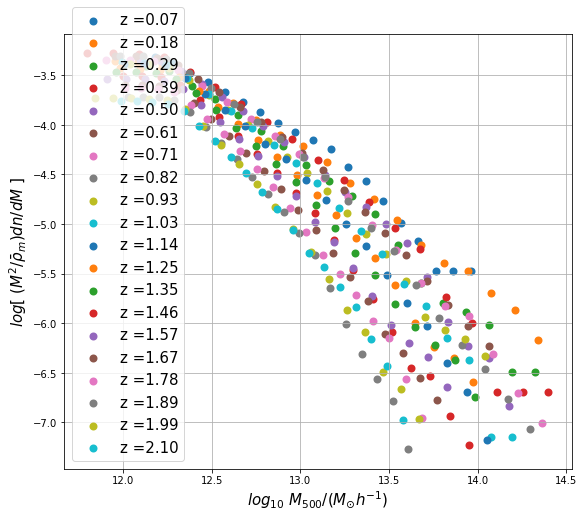

In [55]:
N_bins = 20

x_final = []
y_final = []

plt.figure(figsize=(20,8))

for zz in z_binned[::5]:
    masses = dictionary[zz]
    
    dNdM, M_left = np.histogram(np.log10(masses), bins = N_bins)
    
    for i in range(len(dNdM)):
        dNdM[i] = np.sum(dNdM[i+1:])
    
    dM=np.zeros(N_bins)
    for i in range(0, N_bins):
        dM[i]=10**M_left[i+1]-10**M_left[i]

    M_binned = 10**M_left[:-1]+dM/2
    dndM = dNdM/dif_comoving_volume(zz) #Mpc^(-3)

    plt.subplot(1,2,2)
    #yy = M_binned**2/rho_crit(zz)/1e9*dndM/dM*(1+zz)**3
    #yy = dndM/dM
    yy=dndM
    
    x_final.append(M_binned)
    y_final.append(yy)
    
    plt.scatter(np.log10(M_binned), np.log10(yy), linewidth=2, label='z = '+f'{zz:.2f}')

#plt.scatter(np.log10(x_final), y_final)    
#plt.yscale('log')
plt.xlabel("$log_{10} \ M_{500}/(M_{\odot} h^{-1})$", fontsize = 15)
plt.ylabel(r"$log[ \ (M^2/\bar{\rho}_{m}) dn/dM \ ]$", fontsize = 15)
#plt.title('z = '+f"{zz:.3f}", fontsize=15)
#plt.legend(prop={'size': 15}, handlelength=0, loc=0)
#plt.plot(np.log10(x_fit), np.log10(y_fit), color='black', label='Tinker08', linewidth=2)
plt.grid()
plt.legend(fontsize = 15, loc=3)
plt.show()

Tinker 2008:

In [1075]:
from hmf import MassFunction

In [1076]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10.0,
 'Mmax': 15.0,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [1077]:
MassFunction.parameter_info(["cosmo_model","sigma_8"])

#The parameter names passed filter the output. 
#Call with no parameters to get info on all of them.

cosmo_model : instance of `astropy.cosmology.FLRW` subclass
    The basis for the cosmology -- see astropy documentation. Can be a custom
    subclass. Defaults to Planck15.

sigma_8 : float
    RMS linear density fluctuations in spheres of radius 8 Mpc/h



In [1078]:
mf = MassFunction()

In [1079]:
print(mf.quantities_available())

['ERROR_ON_BAD_MDEF', '_dlnsdlnm', '_growth_factor_fn', '_gtm', '_normalisation', '_power0', '_sigma_0', '_unn_sig8', '_unn_sigma0', '_unnormalised_lnT', '_unnormalised_power', 'cosmo', 'delta_k', 'dndlnm', 'dndlog10m', 'dndm', 'filter', 'fsigma', 'growth', 'growth_factor', 'halo_overdensity_crit', 'halo_overdensity_mean', 'hmf', 'how_big', 'k', 'lnsigma', 'm', 'mass_nonlinear', 'mdef', 'mean_density', 'mean_density0', 'n_eff', 'ngtm', 'nonlinear_delta_k', 'nonlinear_power', 'normalised_filter', 'nu', 'power', 'radii', 'rho_gtm', 'rho_ltm', 'sigma', 'transfer', 'transfer_function']


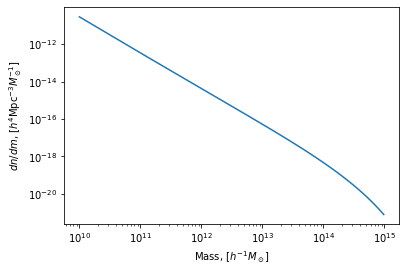

In [1080]:
plt.plot(mf.m,mf.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

In [1089]:
mf = MassFunction(z = 1.0,                  # Redshift of 1.0
                  cosmo_params={"Om0":0.3}, # Matter density of 0.3
                  hmf_model="Tinker08")           # Tinker fitting function

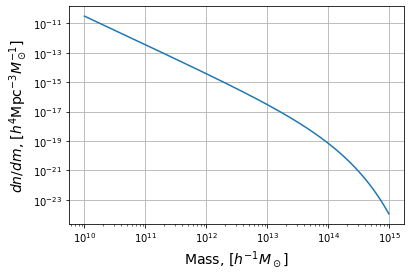

In [1097]:
plt.plot(mf.m,mf.dndm)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize=14)
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$", fontsize=14)
plt.grid()

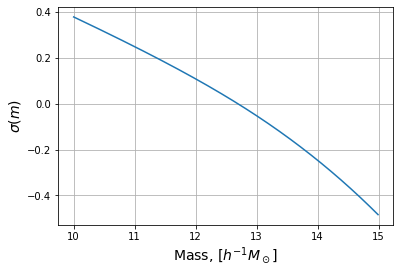

In [1104]:
plt.plot(np.log10(mf.m), np.log10(mf.sigma))

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$", fontsize=14)
plt.ylabel(r"$\sigma(m)$", fontsize=14)
plt.grid()

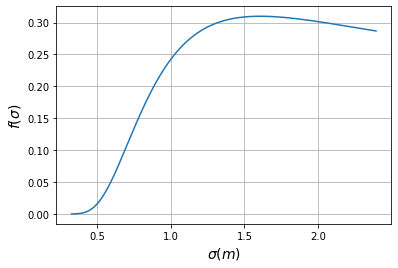

In [1105]:
plt.plot(mf.sigma, mf.fsigma)

plt.xlabel(r"$\sigma(m)$", fontsize=14)
plt.ylabel(r"$f(\sigma)$", fontsize=14)
plt.grid()
plt.show()

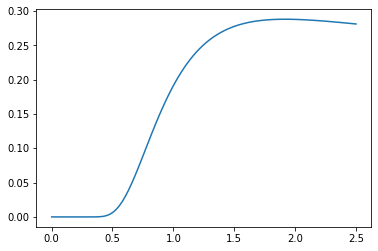

In [1092]:
def func(sigma):
    A = 0.218
    a = 1.61
    b = 1.87
    c = 1.45
    return A*( (sigma/b)**(-a) + 1 )*np.exp(-c/sigma**2)

x = np.linspace(0.001,2.5,100)
plt.plot(x, func(x))
plt.show()

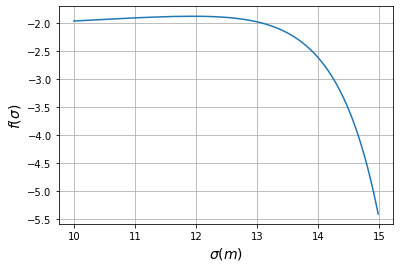

In [1125]:
x_fit = mf.m
y_fit = mf.m**2*mf.dndm/2.77e11

plt.plot(np.log10(mf.m), np.log10(mf.m**2*mf.dndm/2.77e11))

plt.xlabel(r"$\sigma(m)$", fontsize=14)
plt.ylabel(r"$f(\sigma)$", fontsize=14)
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.show()

$\Sigma^2(V) = <M^2> - <M>^2$

In [126]:
SIGMA2 = np.average( ( ( M500s - np.average(M500s) )/np.average(M500s) )**2 )
sigma = np.sqrt(SIGMA2)
sigma #M_sun
#sigma*2*10**33 # g

1.4377597862678728

In [74]:
V = 3.1*10**76 #cm^3

sigma2 = SIGMA2/V
sigma = np.sqrt(sigma2)
sigma 

4.3328857225133284e-26

In [ ]:
sigma = 1.69

rho_m = 8.5*10**(-30) # g cm^(-3)

dn_dM = func(sigma)*pho_m/M 

$ \sigma(M) = \frac{\delta M}{M} = \big< \big( \frac{M - \langle M \rangle}{\langle M \rangle} \big) ^2 \big> ^{1/2}$


$\large \sigma_8$: amplitude of density fluctuations


$\sigma(M) = \frac{\delta M}{M} = \sigma_8 \big( \frac{M}{M_8} \big), \ \ \ M_8 = \frac{4\pi}{3}(8 h^{-1} Mpc)^3 \bar{\rho} $

In [560]:
ma = masses 
# почему-то теряется одно значение массы

for j in range(0,N1): #check every bin
    print('Number of bin:', j)
    M_mean = np.log10(M_binned[j])
    print('Log Mean mass:', M_mean) #M_binned is mean mass
    print('Borders:', f"{M_left[j]:.3f}", '....', f"{M_left[j+1]:.3f}")
    counter = 0
    sigma_2 = 0
    for mass in ma:
        if (mass>=10**M_left[j]) and (mass<10**M_left[j+1]):
            #print(M_left[j], '<', np.log10(mass), '<', M_left[j+1])
            #print(f"{np.log10(mass):.3f}")
            sigma_2 = sigma_2 + (mass/M_binned[j]-1)**2
#            print((mass/M_binned[j]-1)**2)
            counter = counter+1
#    print()
#    print(sigma_2, counter)
    
    sigma = np.sqrt(sigma_2/counter)
    print('sigma = ', sigma)
    print()
    plt.scatter(np.log10(M_binned[j]), sigma)
    plt.yscale('log')

#            #print(z_current, 'is between', z_l, 'and', z_l+dz)
#            dictionary[z_l+dz/2].append(_[1])
#        else:
#            pass

In [1064]:
!hmf --version

Usage: hmf [OPTIONS] COMMAND [ARGS]...
Try 'hmf --help' for help.

Error: No such option: --version


In [1063]:
!pip install CAMB

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 3.9 MB/s eta 0:00:0000:0100:01
  Created wheel for CAMB: filename=camb-1.3.5-py3-none-any.whl size=1008644 sha256=1fb95c4b584ecdb7bc20ba50c04ad04b273813eccc8fa71fd0a0fbc9f4728aa3
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/36/51/cb/91105e399412c25a6d47d668b781cc47a908c730d9442267b7
Successfully built CAMB
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you 

In [1060]:
!/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.2
    Uninstalling pip-22.0.2:
      Successfully uninstalled pip-22.0.2
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/

80610.0

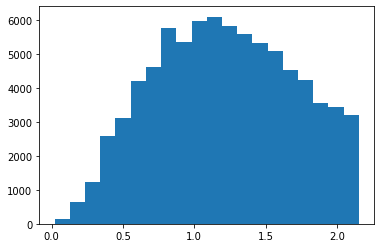

In [101]:
spisok = pd.read_csv("eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')
spisok
redshifts = sorted(list(set(spisok['z_true'])))
sum(plt.hist(redshifts, bins = 20)[0])

In [ ]:


x = model[:,0]
y1 = model[:,1]
y2 = model[:,2]

plt.errorbar(x,y2, linewidth=1)#, xerr=xe, yerr=ye)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.09, 11.)
#plt.ylim(10**(-6), 0.05)
plt.ylim(10**(-9), 2.0)
plt.xlabel('E, keV', fontsize = 16)
plt.ylabel('F, $phot \ s^{-1} \ cm^{-2} \ keV^{-1}$', fontsize = 16)
plt.title('Model spectrum ($cflux*wabs*apec$)', fontsize = 16)
plt.xticks(size=15)
plt.yticks(size=15)
t1 = [0.2, 0.4, 0.6, 1, 2, 4, 10]
plt.xticks(t1,t1)
plt.grid()
plt.savefig("model_spectrum_cflux_wabs_apec.png")
plt.show()